In [87]:
##### Imports #####
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## <span style="color:blue"> Summary data : </span> 
    
    1. In this notebook we briefly talk about the EDA
    2. we figure out what kind of transformation we should do for skewed data
    3. what should be the imputation strategy
    4. what features are redundant and highly correlated 
    5. we eventually bring down feature size from 62 columns to 37
    6. reducing feature space helps us focus on important features 
    

## <span style="color:blue">1. Load data </span>

In [88]:
full_df = pd.read_csv('./dataset - v2.csv')
full_df.head(2)

,decision_id,label,default,v1,v2,v3,v4,v5,v6,v7,...,v50,brand,carrier,device_name,gms_version,manufacturer,network_type,screen_height,screen_width,screen_dpi
0,94dac214-e5d0-4758-b7ec-5a8e899b7f3e,modeling,0.0,0.0,41247.87,4526.83,0.0,73.0,15231.14,0.0,...,0.0,OPPO,Jio 4G,OPPO CPH1931,21.02.14 (120406-352619232),OPPO,Unknown_0,1456.0,720.0,xhdpi
1,bcab40cd-4aaa-43d2-ae82-7d9ba2ded0a9,modeling,1.0,1.0,10278.99,35633.86,0.0,24.0,55549.52,0.0,...,0.0,OPPO,airtel,OPPO CPH1931,20.50.16 (120406-351607135),OPPO,Unknown_0,1456.0,720.0,xhdpi


In [89]:
# check different column types
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6246 entries, 0 to 6245
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   decision_id    6246 non-null   object 
 1   label          6246 non-null   object 
 2   default        4661 non-null   float64
 3   v1             5046 non-null   float64
 4   v2             6008 non-null   float64
 5   v3             5999 non-null   float64
 6   v4             5932 non-null   float64
 7   v5             6008 non-null   float64
 8   v6             5618 non-null   float64
 9   v7             5932 non-null   float64
 10  v8             5868 non-null   float64
 11  v9             5932 non-null   float64
 12  v10            5609 non-null   float64
 13  v11            6008 non-null   float64
 14  v12            6007 non-null   float64
 15  v13            5932 non-null   float64
 16  v14            5916 non-null   float64
 17  v15            6008 non-null   float64
 18  v16     

In [75]:
# describe the data
full_df.describe()

,default,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v43,v44,v45,v46,v47,v48,v49,v50,screen_height,screen_width
count,4661.000000,5046.000000,6.008000e+03,5.999000e+03,5932.000000,6008.000000,5.618000e+03,5932.000000,5868.000000,5932.000000,...,6.008000e+03,5046.000000,5046.000000,5290.000000,6008.000000,5.385000e+03,5374.000000,5609.000000,6006.000000,6006.000000
mean,0.225059,1.629608,2.619055e+05,2.199061e+04,0.146325,111.230859,1.303839e+05,0.259777,11.941462,1.623399,...,1.178164e+04,0.509909,4478.063107,90.355955,0.020140,1.085920e+04,35.270151,0.028882,1786.449217,921.368132
std,0.417666,2.759280,8.909667e+05,7.648984e+04,0.530155,96.455055,8.320096e+05,0.538312,171.103125,2.198184,...,4.221905e+04,1.322595,20941.147996,1259.751455,0.151878,8.529957e+04,374.030148,0.247427,395.340100,194.011836
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000e+00,0.000000,-308.000000,0.000000,...,0.000000e+00,0.000000,-70569.500000,-221.000000,0.000000,1.000000e-01,0.000000,0.000000,720.000000,480.000000
25%,0.000000,0.000000,1.972173e+04,1.056220e+03,0.000000,40.000000,1.891388e+04,0.000000,0.000000,1.000000,...,6.685525e+02,0.000000,0.000000,0.000000,0.000000,2.068500e+03,0.000000,0.000000,1409.250000,720.000000
50%,0.000000,1.000000,5.538326e+04,5.316050e+03,0.000000,85.000000,4.088240e+04,0.000000,0.000000,1.000000,...,1.937610e+03,0.000000,0.000000,0.000000,0.000000,4.382960e+03,0.000000,0.000000,1920.000000,1080.000000
75%,0.000000,2.000000,1.499859e+05,1.606369e+04,0.000000,154.000000,9.767239e+04,0.000000,0.000000,2.000000,...,6.010400e+03,0.000000,200.375000,0.000000,0.000000,9.464270e+03,0.000000,0.000000,2132.000000,1080.000000
max,1.000000,58.000000,3.228484e+07,3.117544e+06,7.000000,797.000000,5.126493e+07,7.000000,5744.000000,52.000000,...,1.455983e+06,25.000000,865634.460000,55000.000000,3.000000,6.006312e+06,20519.000000,4.000000,3120.000000,2183.000000


    1. Since there are lot of columns, It is hard to do analysis from the describe function alone
    2. we need to check the distribution of the columns alone(univariate) and with respect to earch other(bivariate)

## <span style="color:blue">2. EDA </span>

    - I had gone through the columns with their descriptions
    - some columns have binary values, for example default, v18, v34
    - v18 --> FLAG - OTHER LOAN
    - v34 --> FLAG - GOLD LOAN
    - let us do uni/bi variate analysis to figure out more about the data

### <span style="color:blue">2.1 Univariate analysis </span>

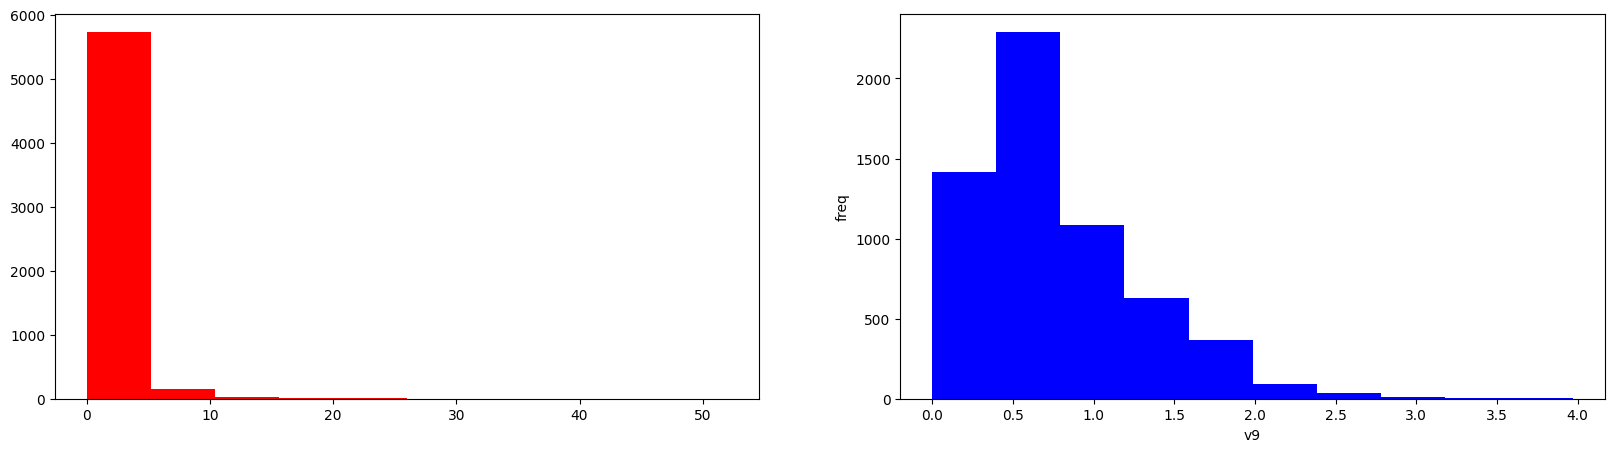

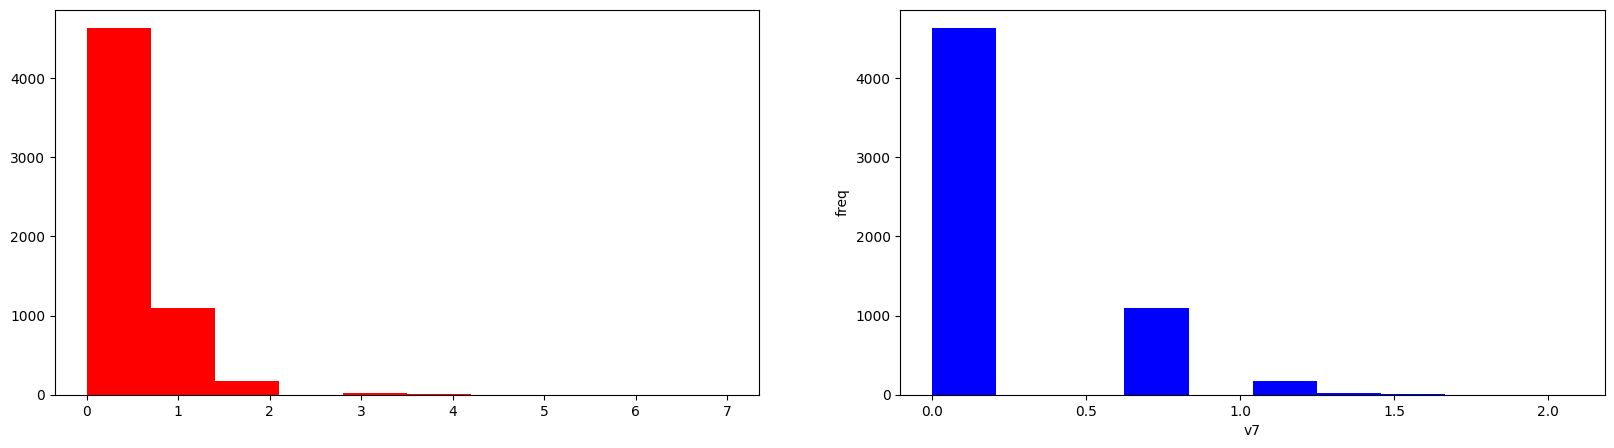

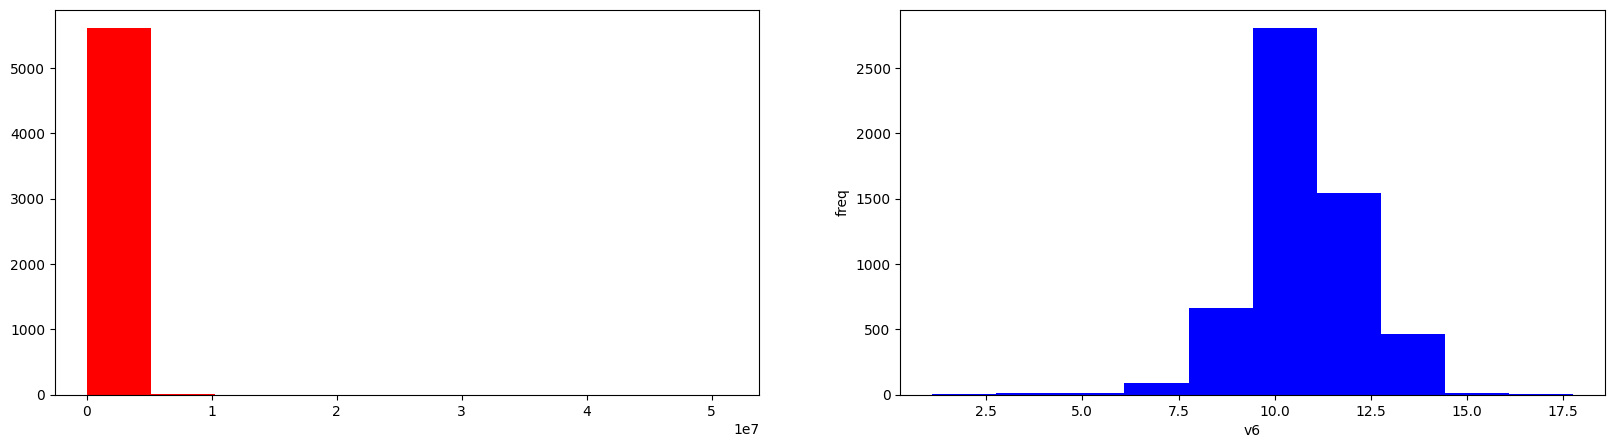

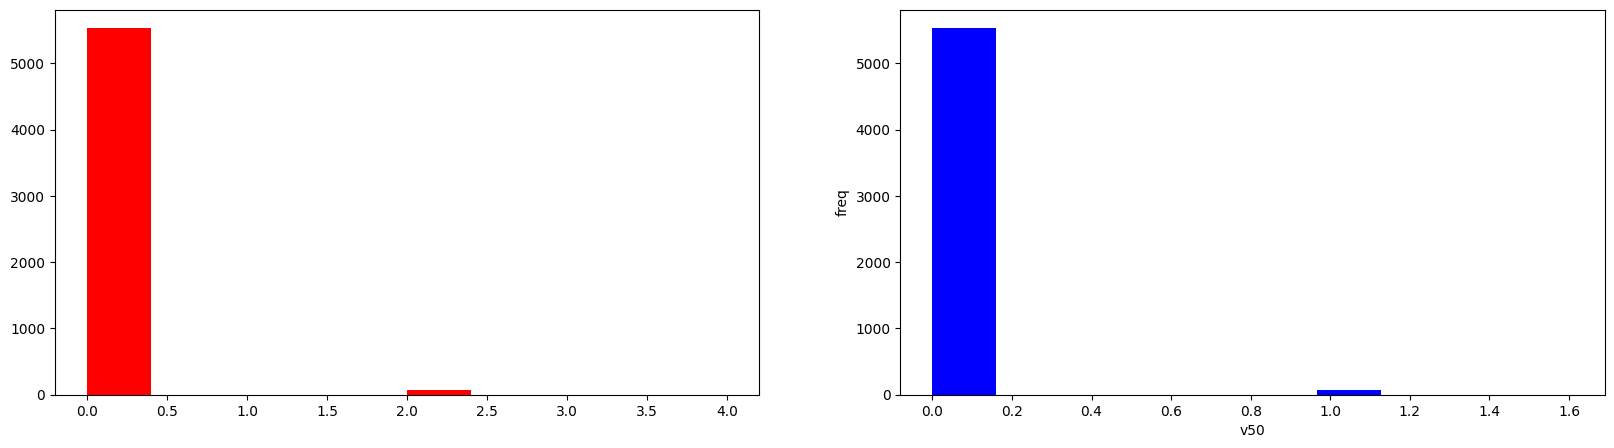

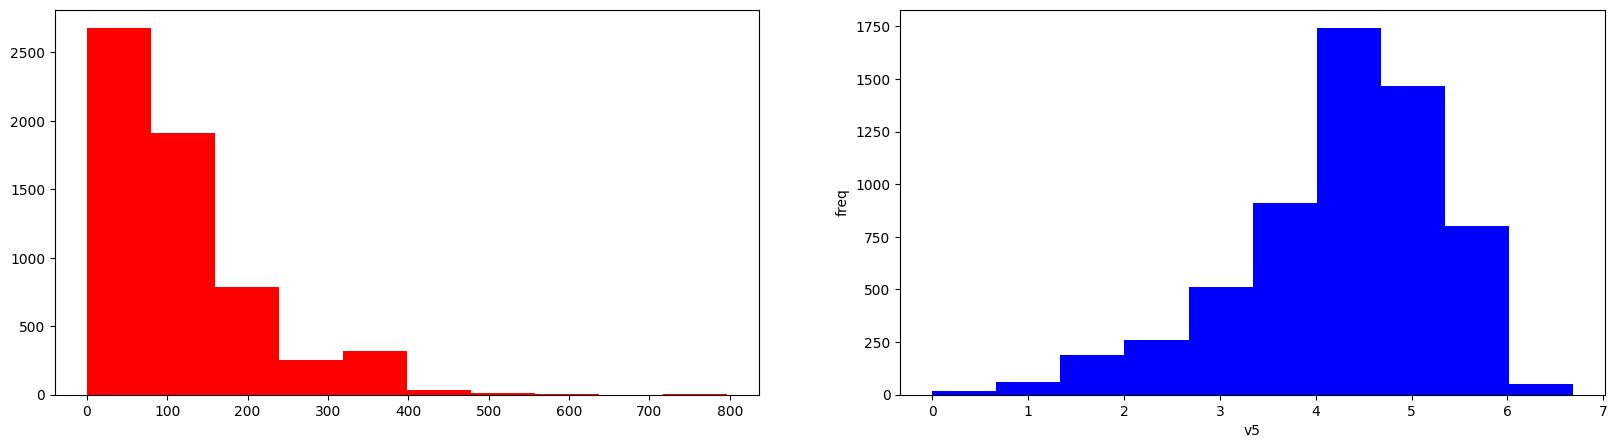

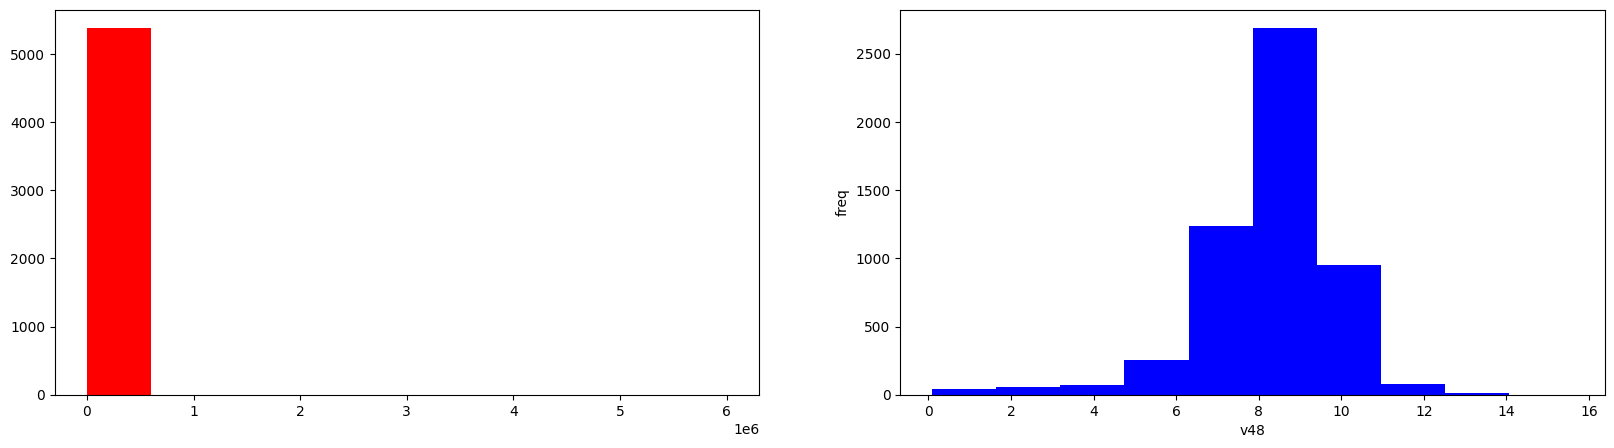

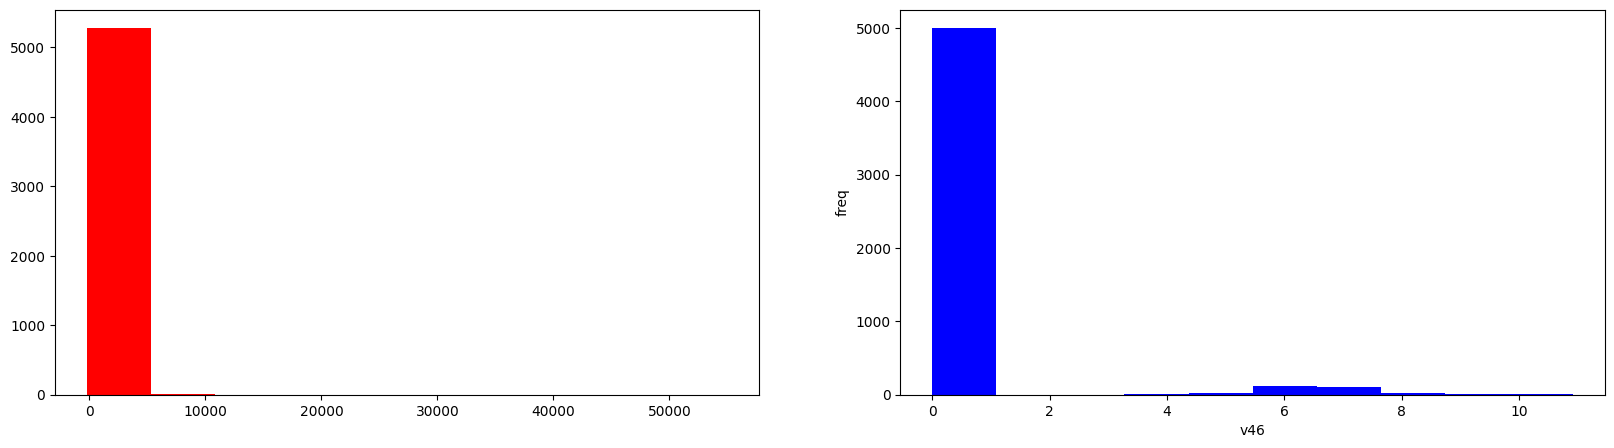

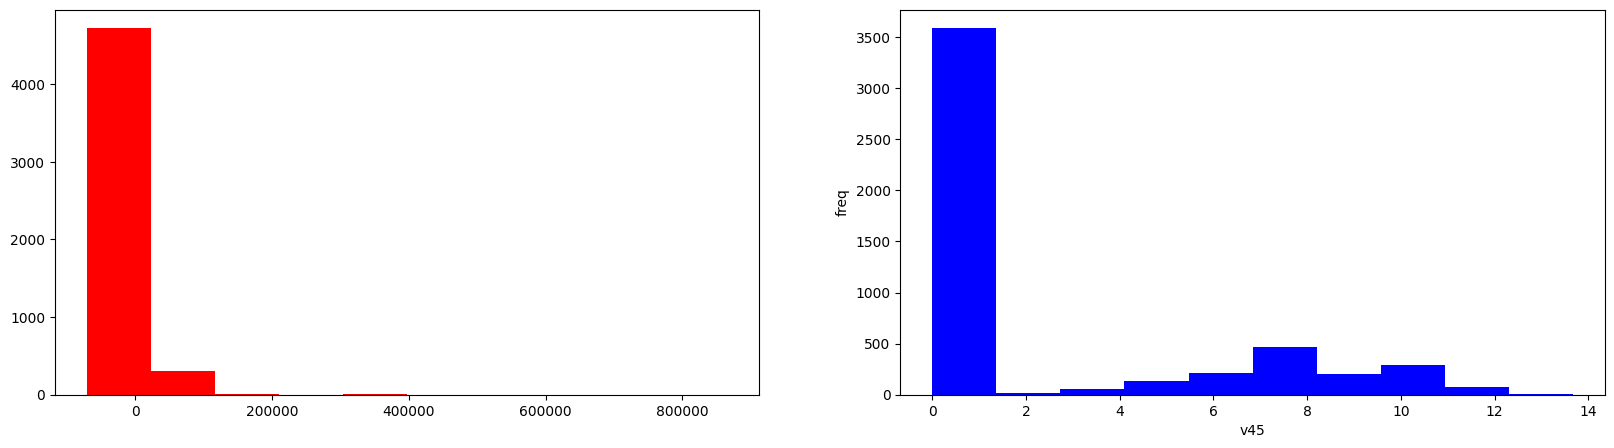

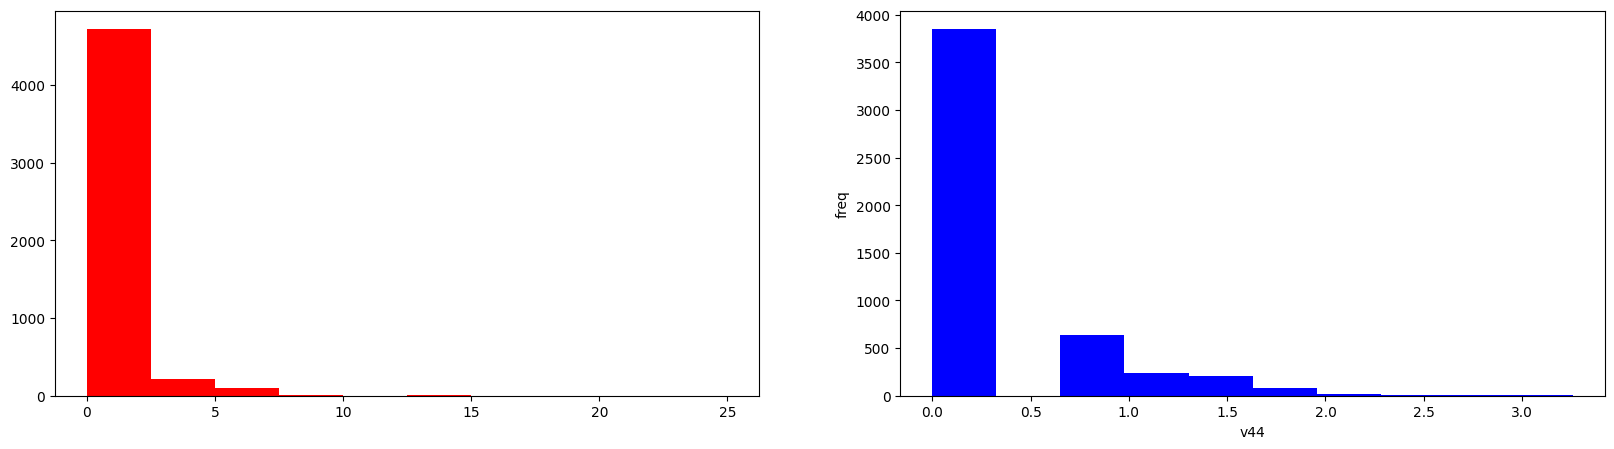

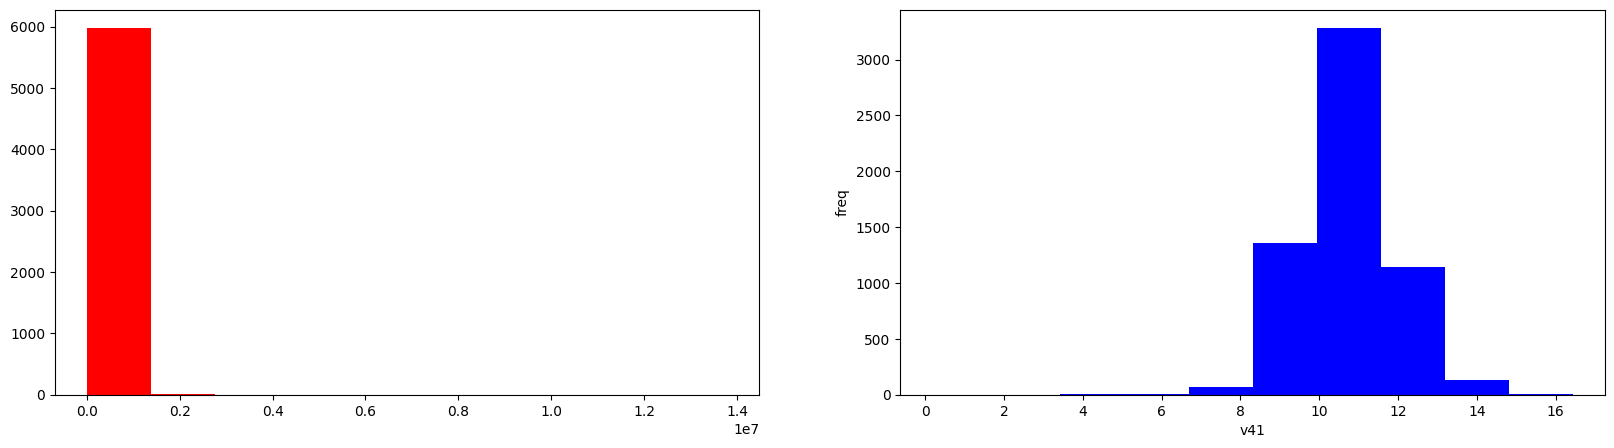

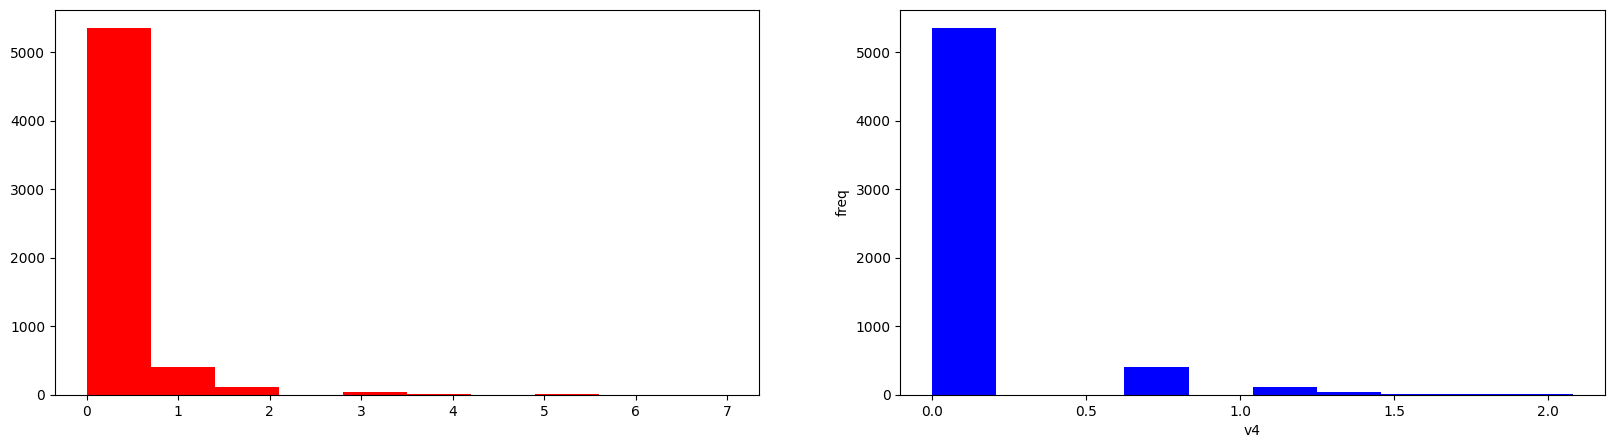

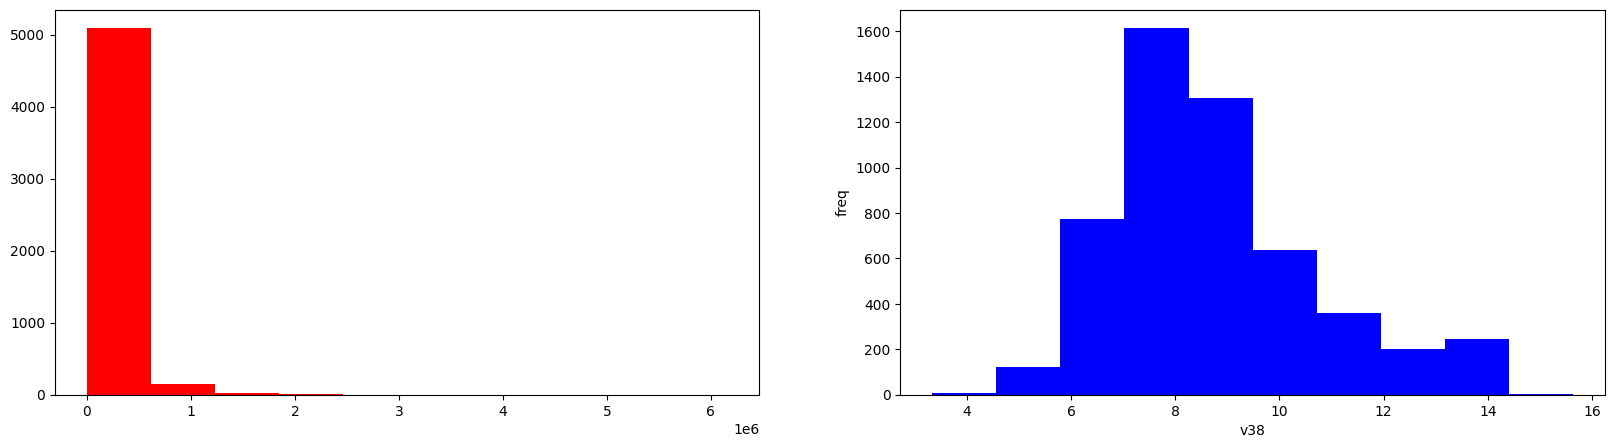

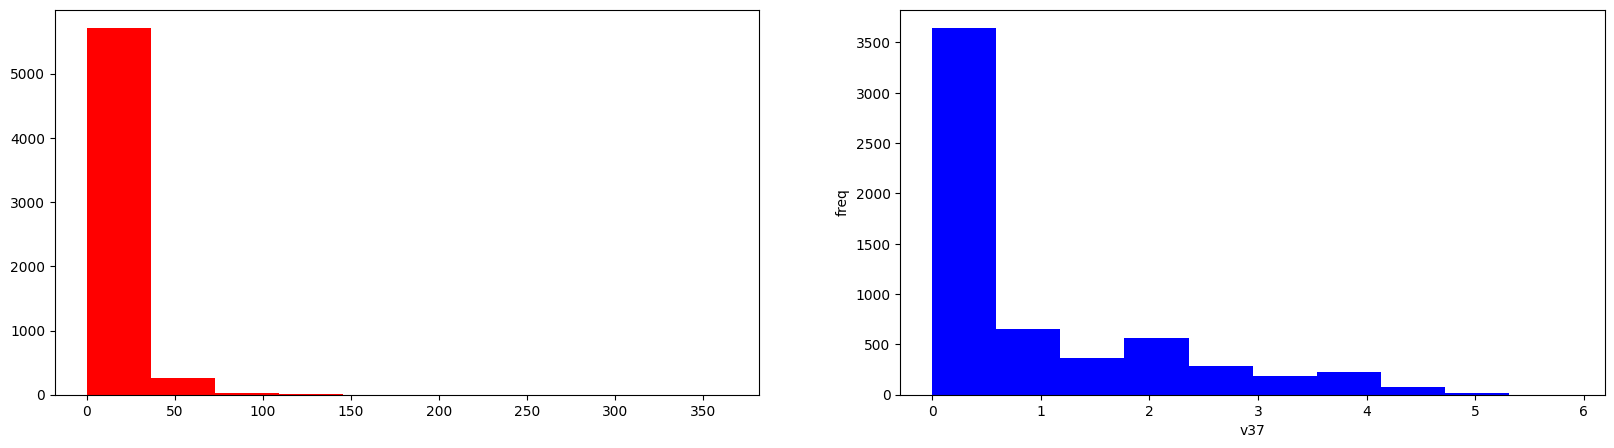

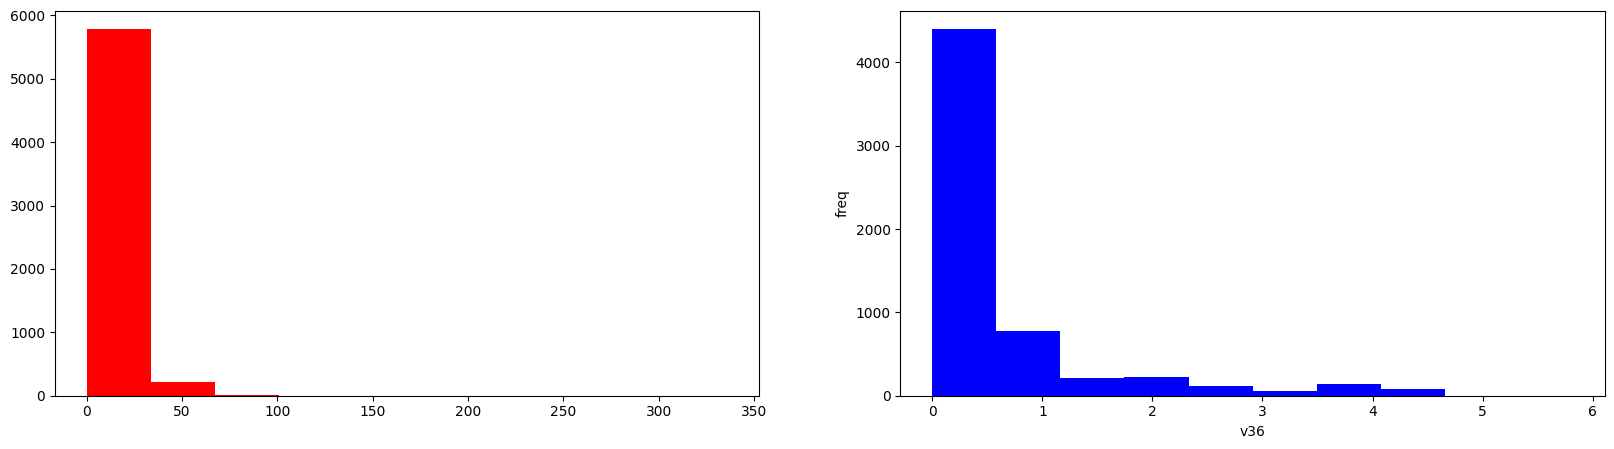

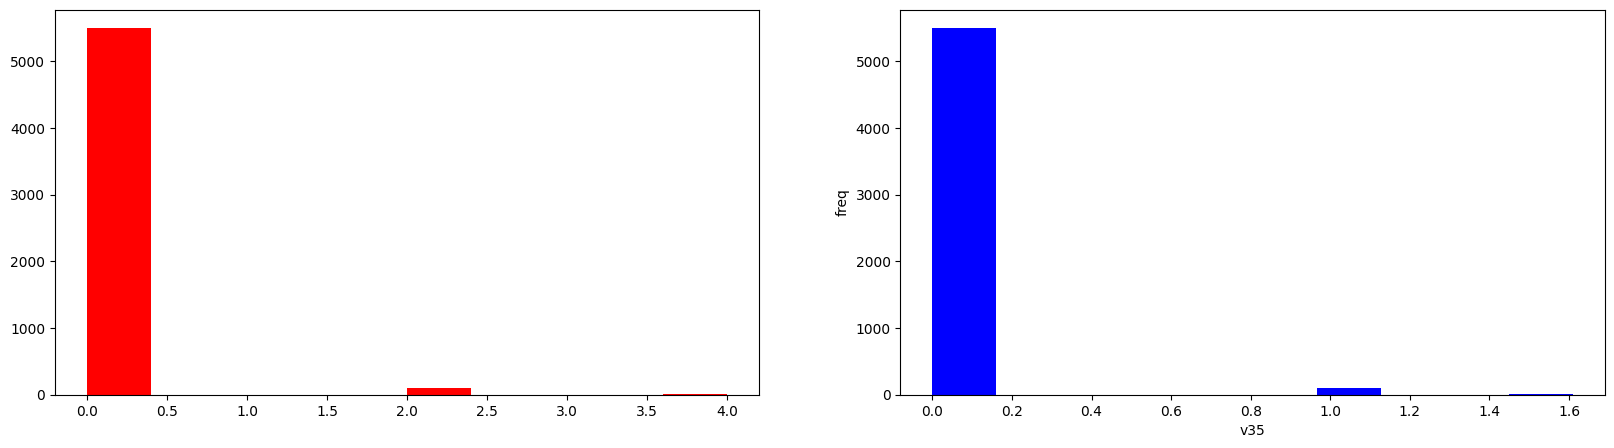

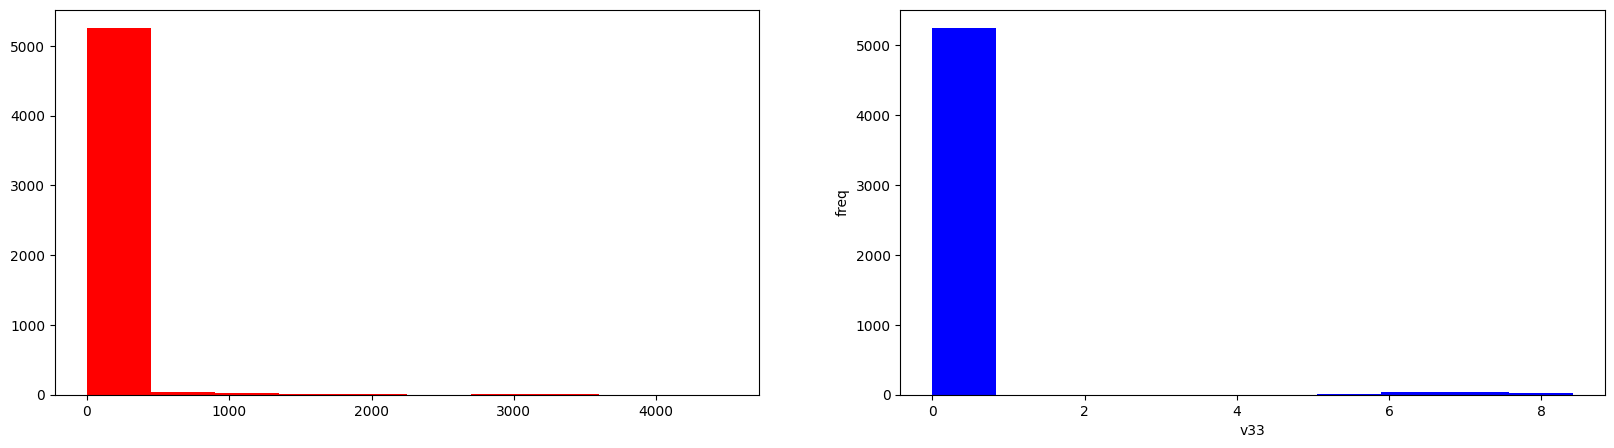

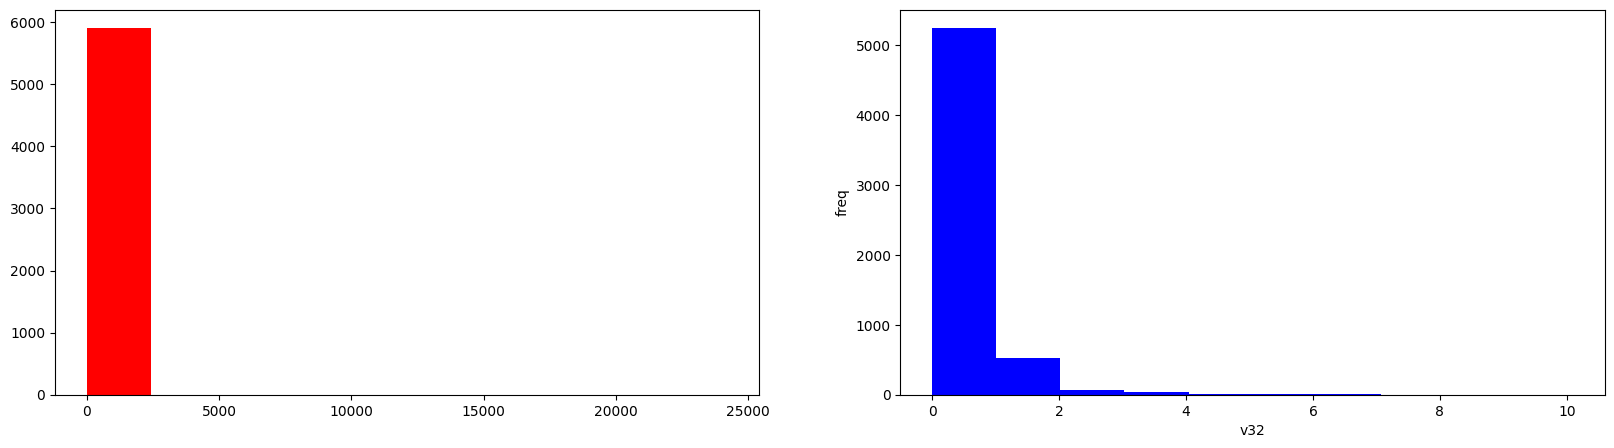

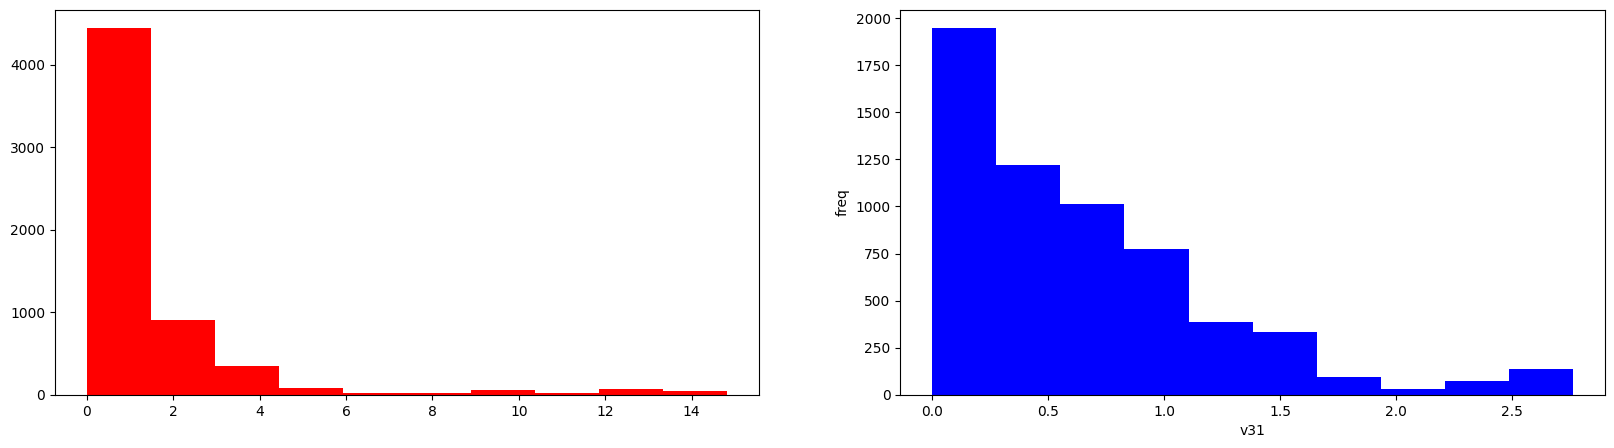

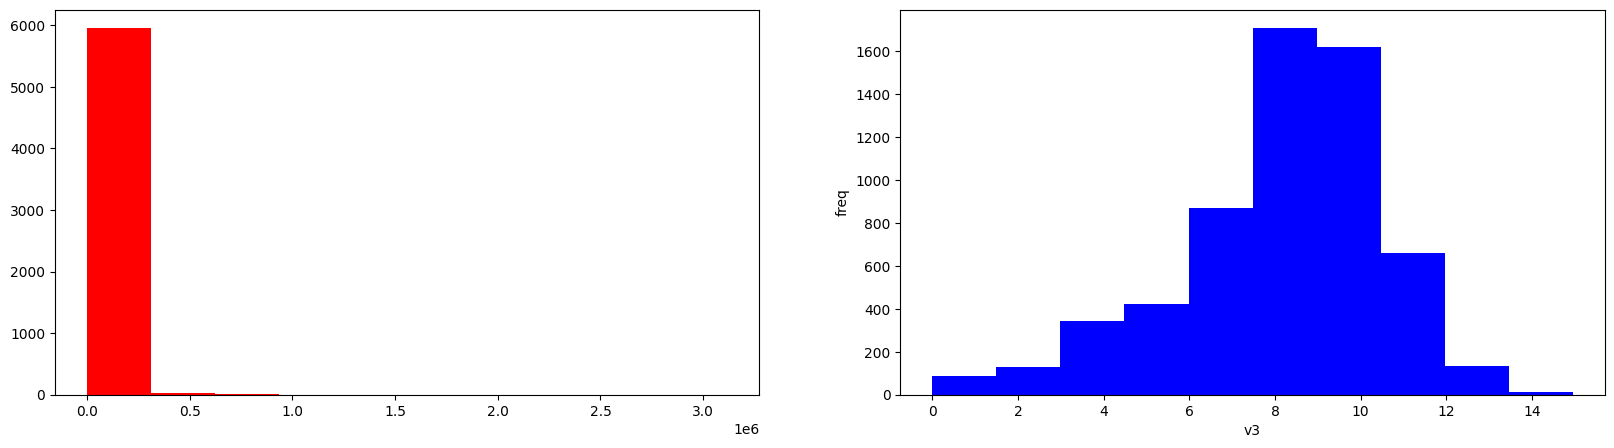

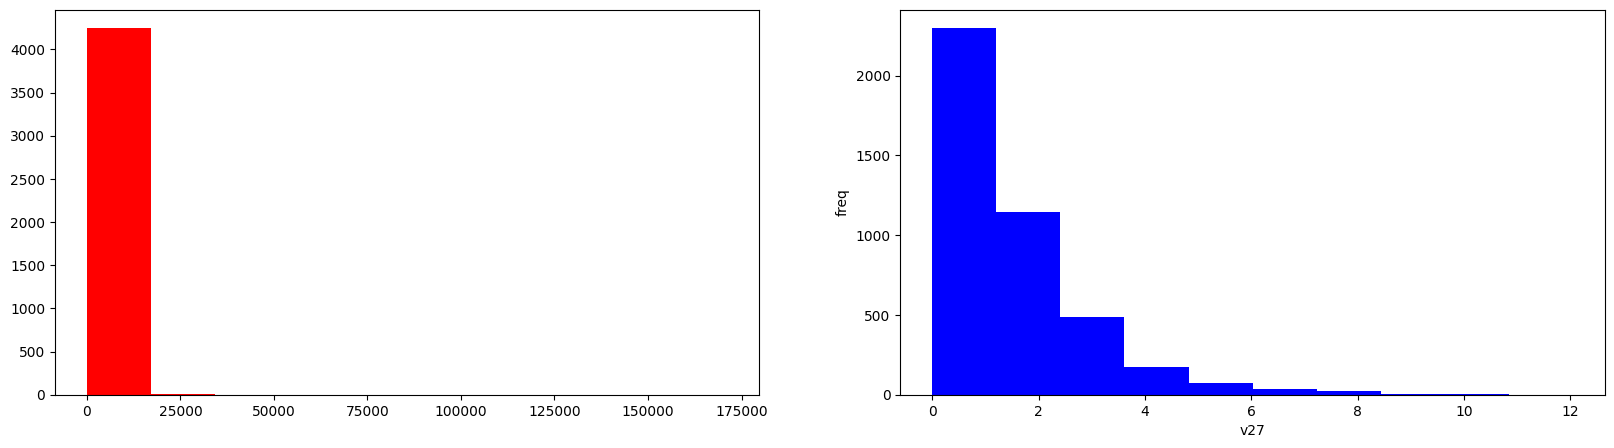

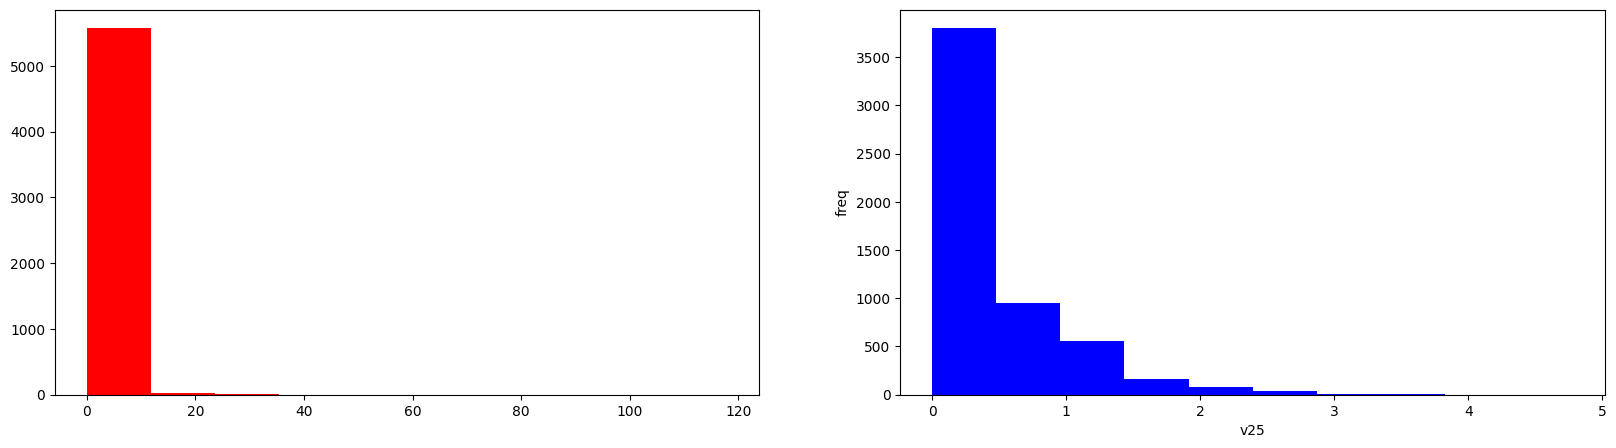

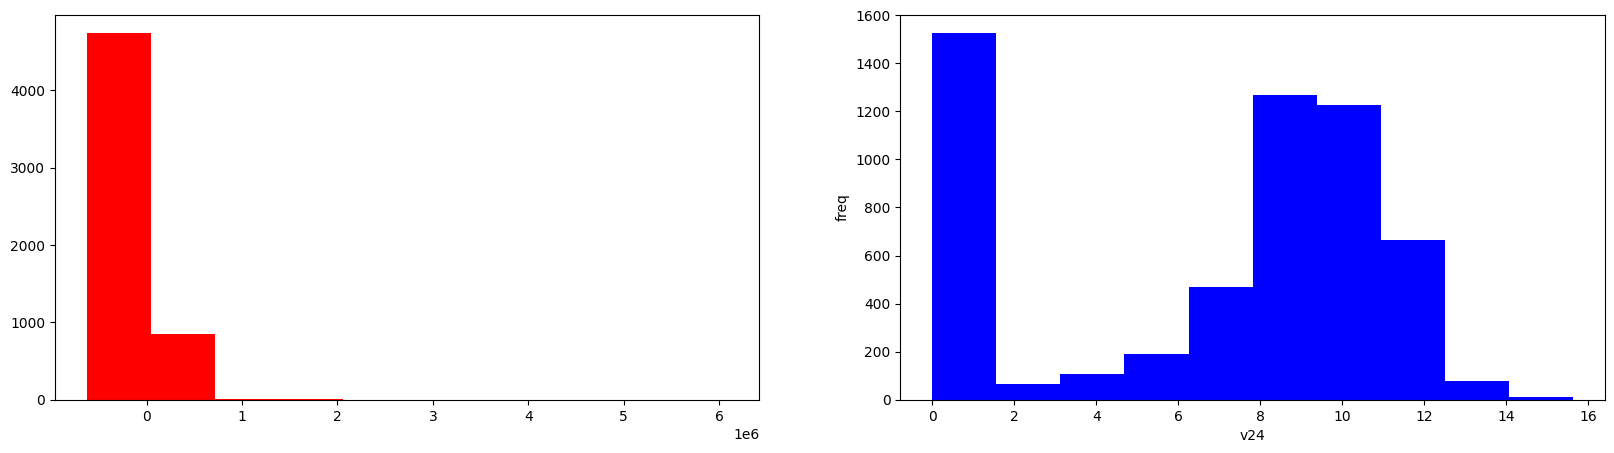

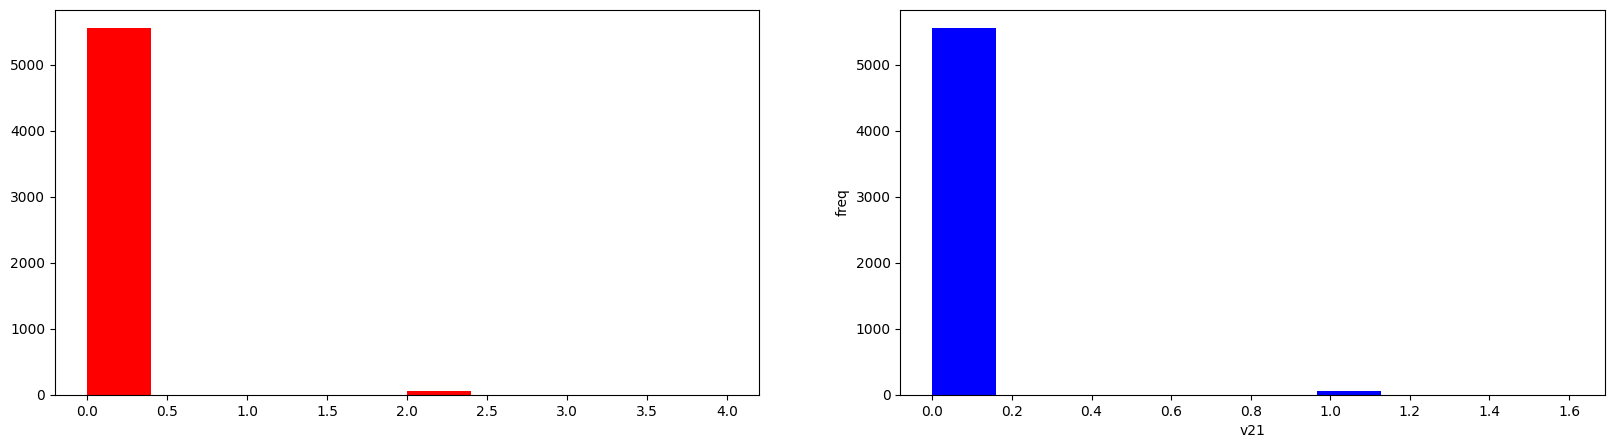

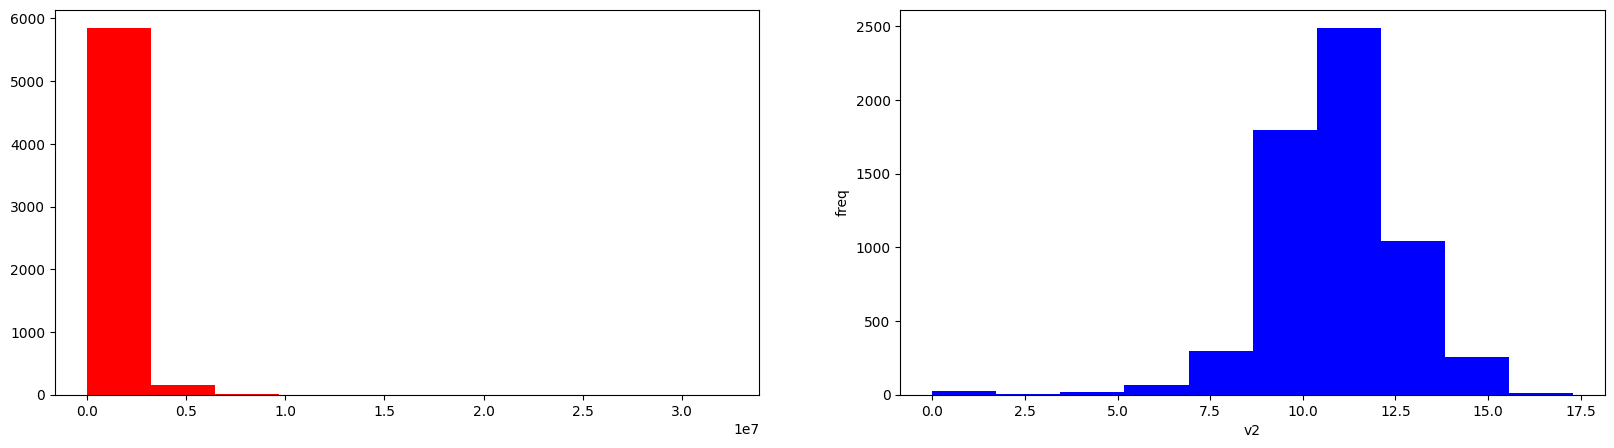

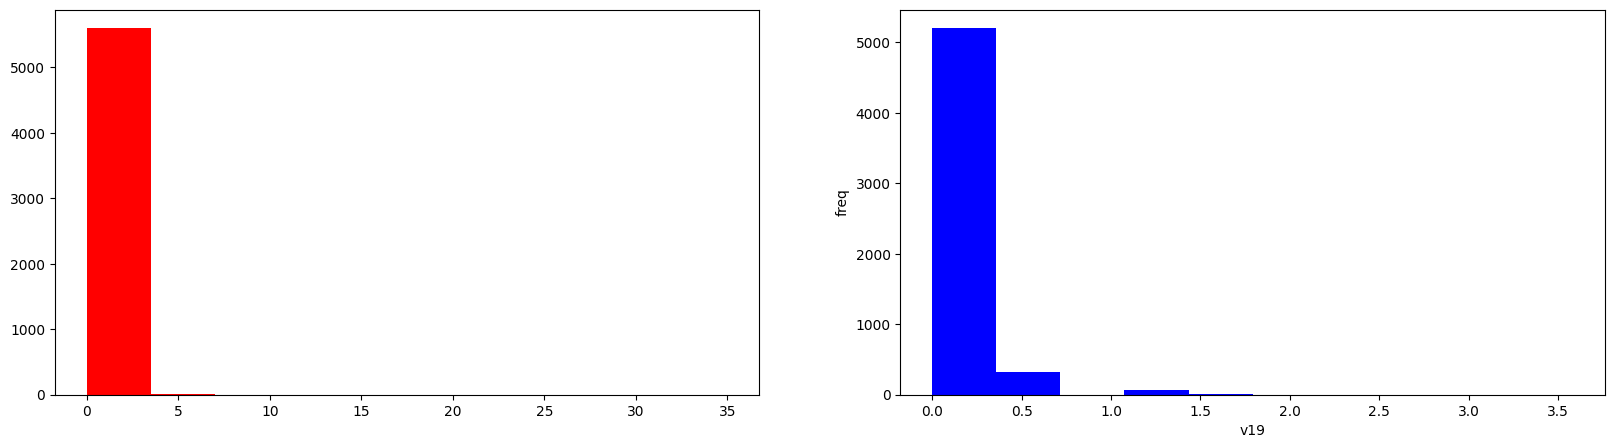

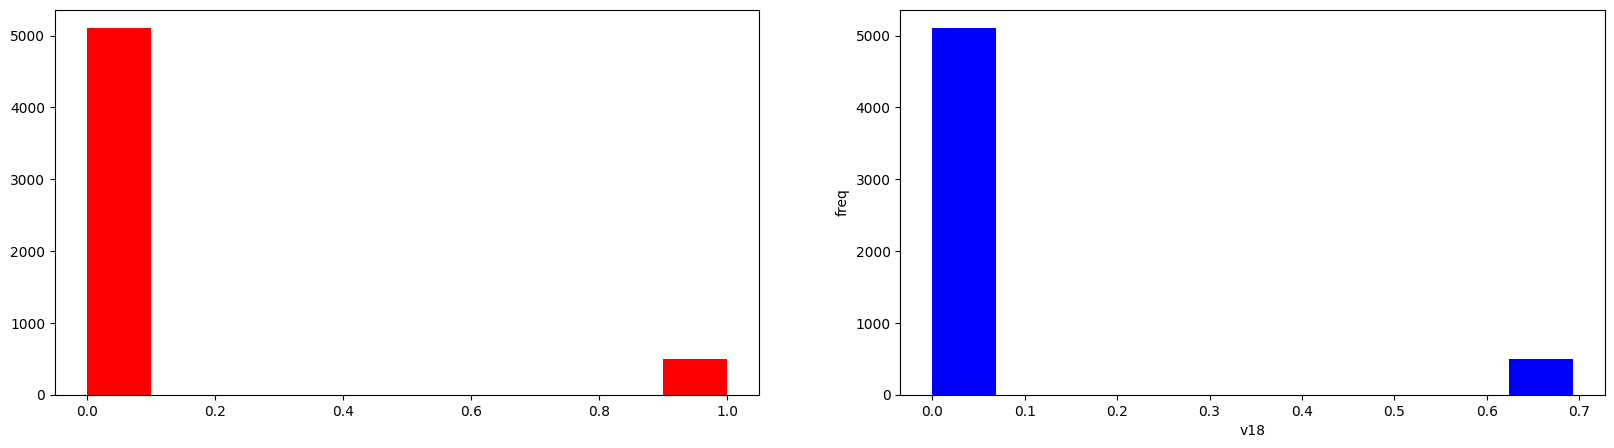

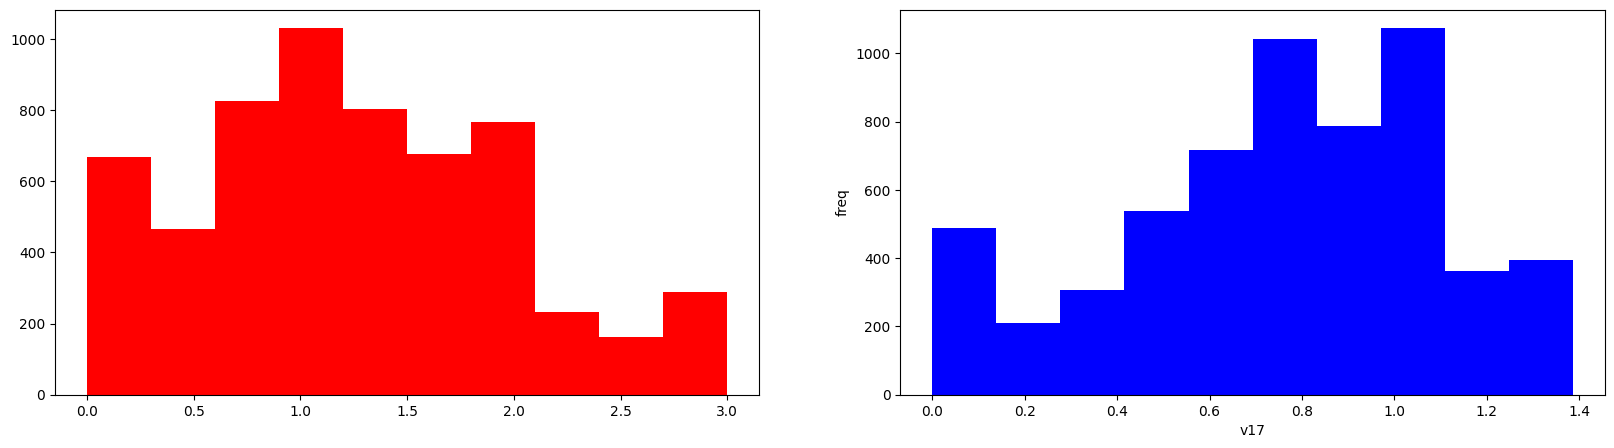

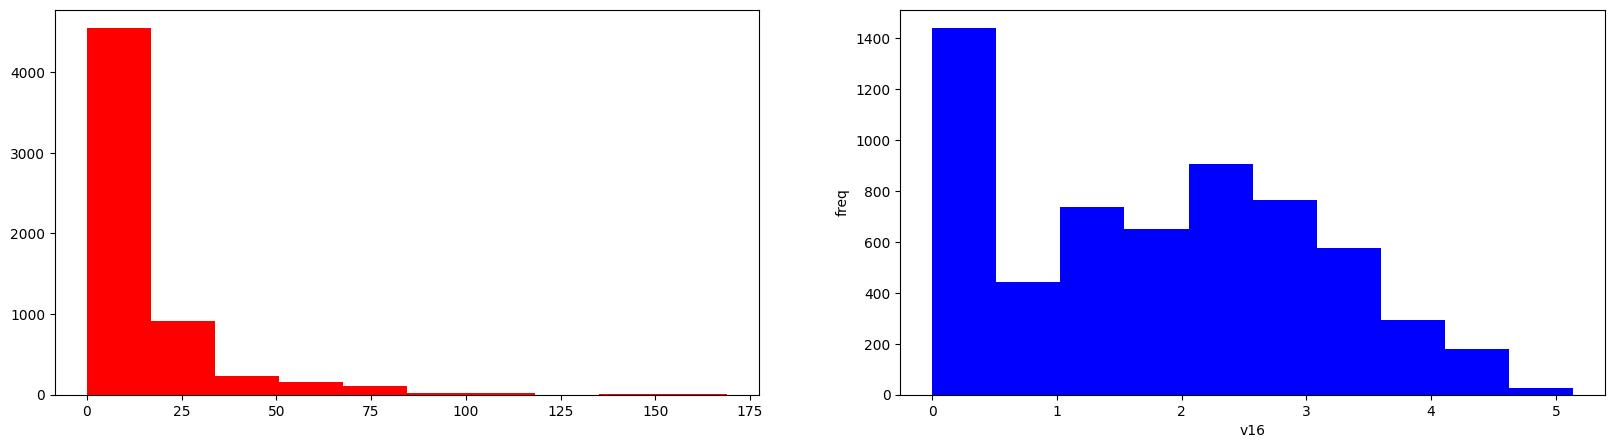

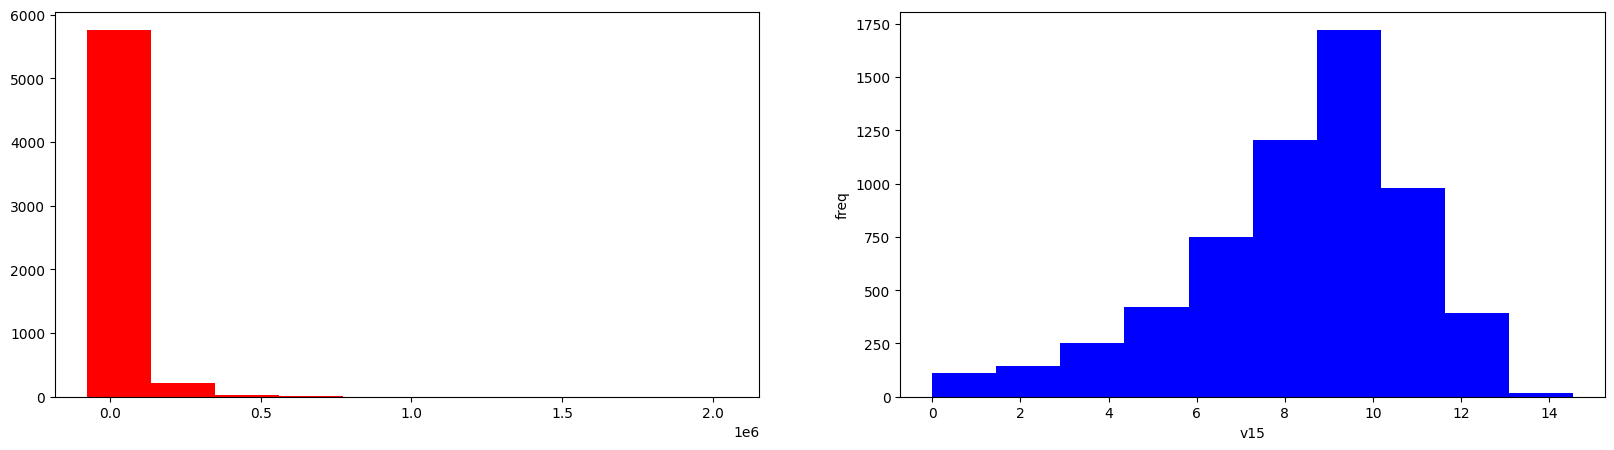

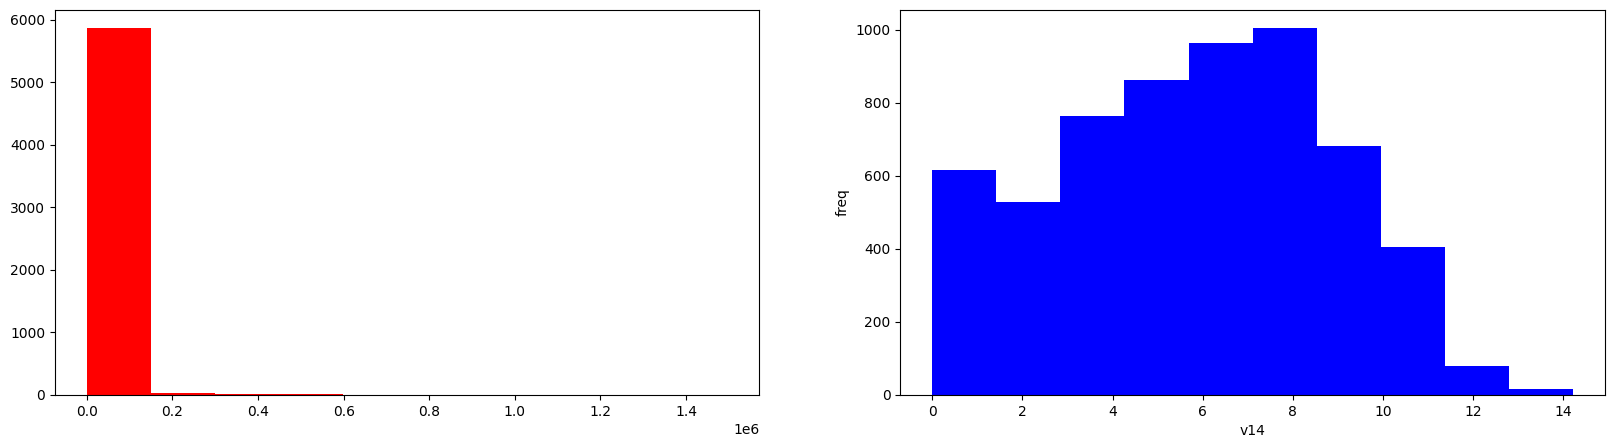

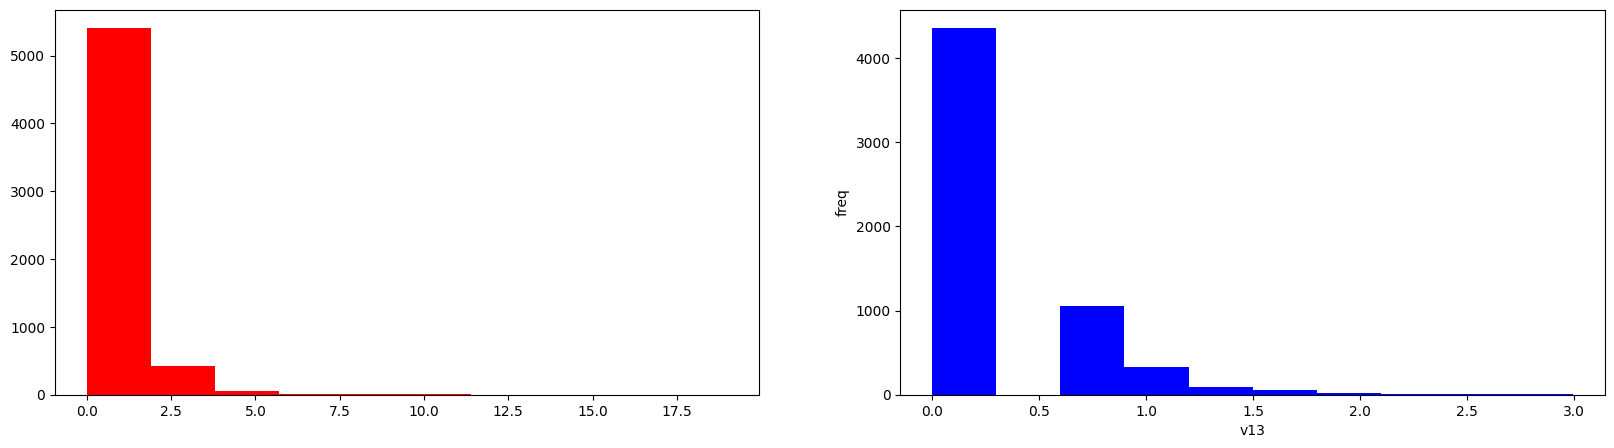

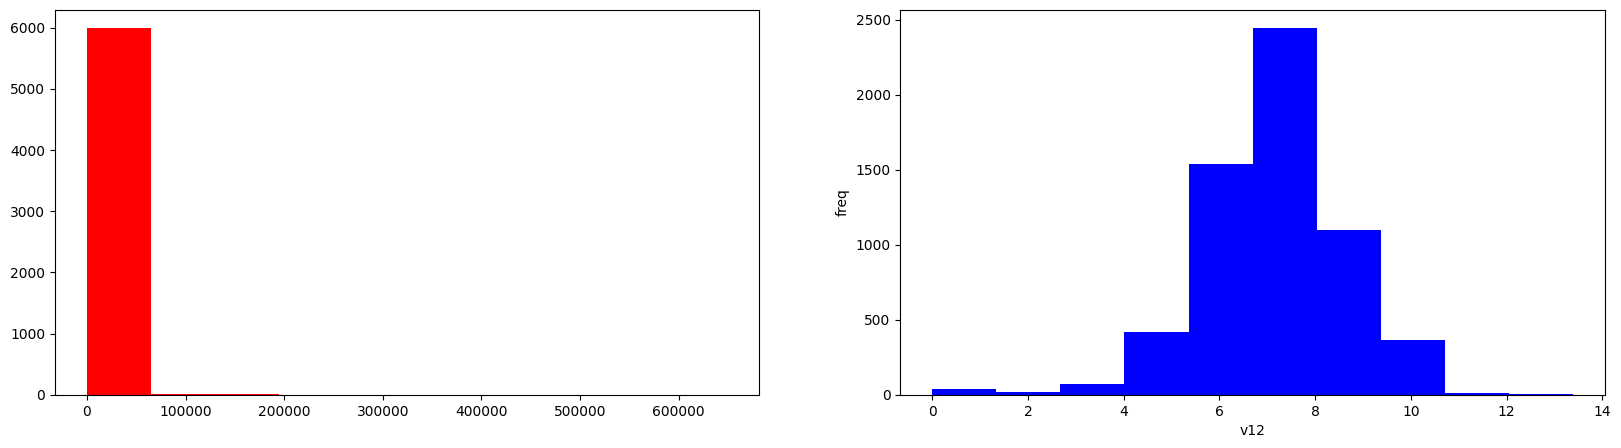

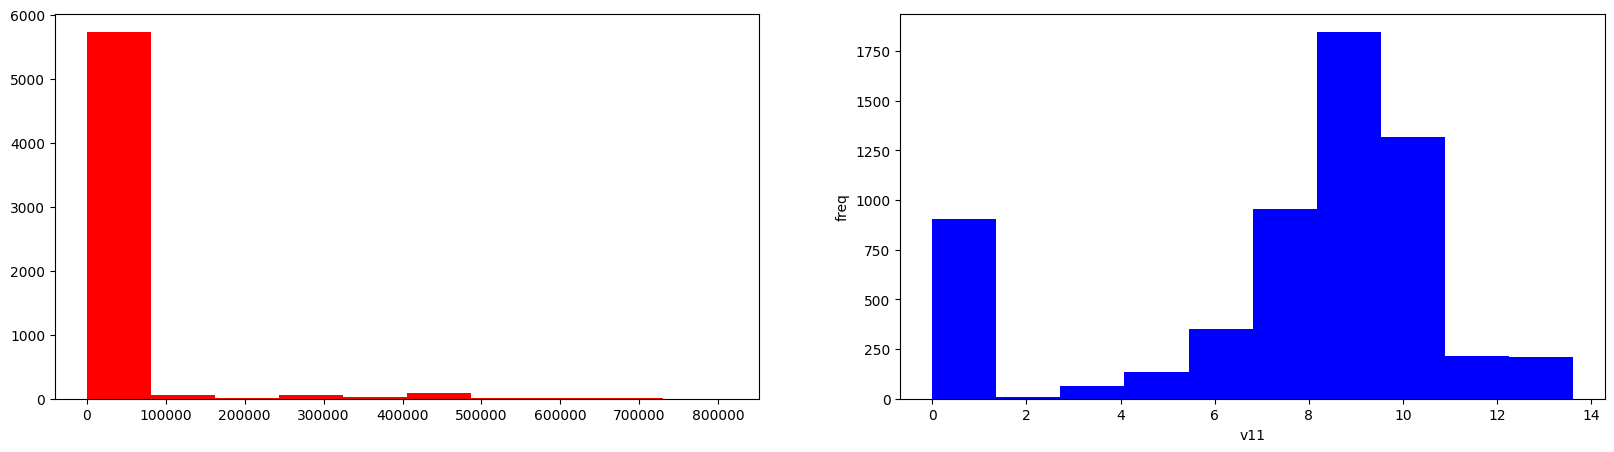

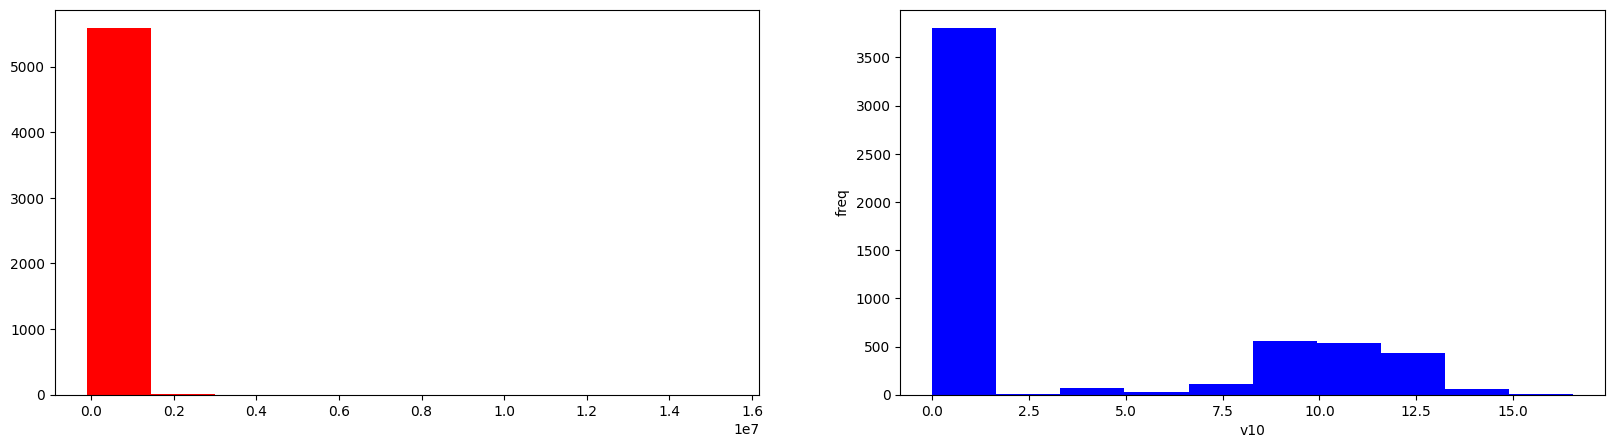

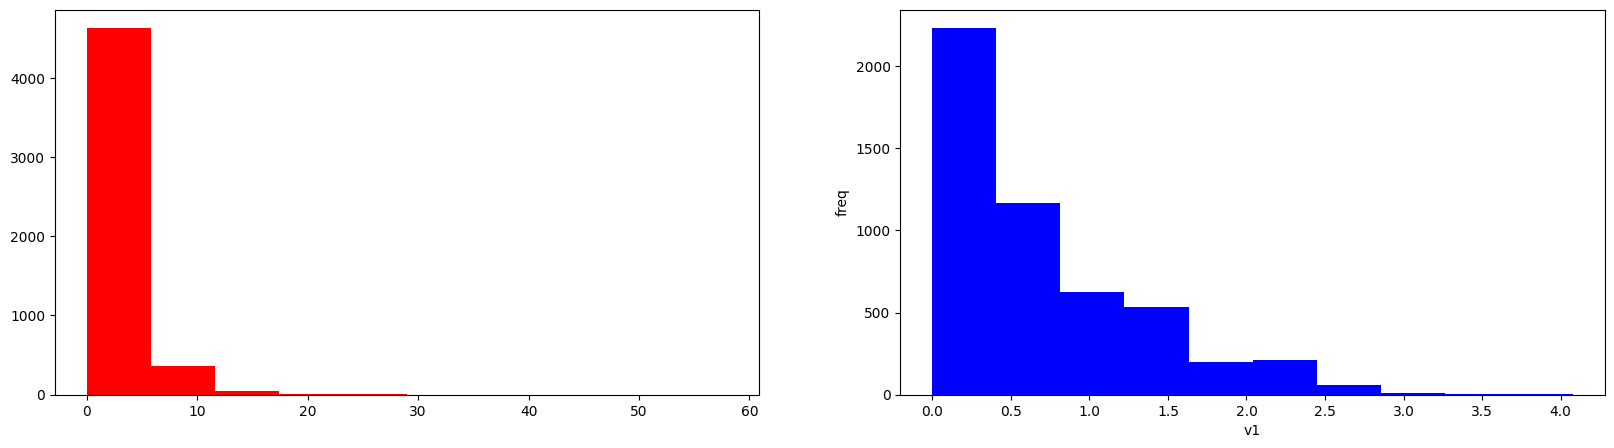

In [76]:
for col in final_columns[:-2]:
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (20, 5),)
    
    ax1.hist(full_df[[col]],color= 'red')
    plt.xlabel(col)
    plt.ylabel('freq')
    
    ax2.hist(np.log1p(full_df[[col]]),color= 'blue')
    plt.xlabel(col)
    plt.ylabel('freq')

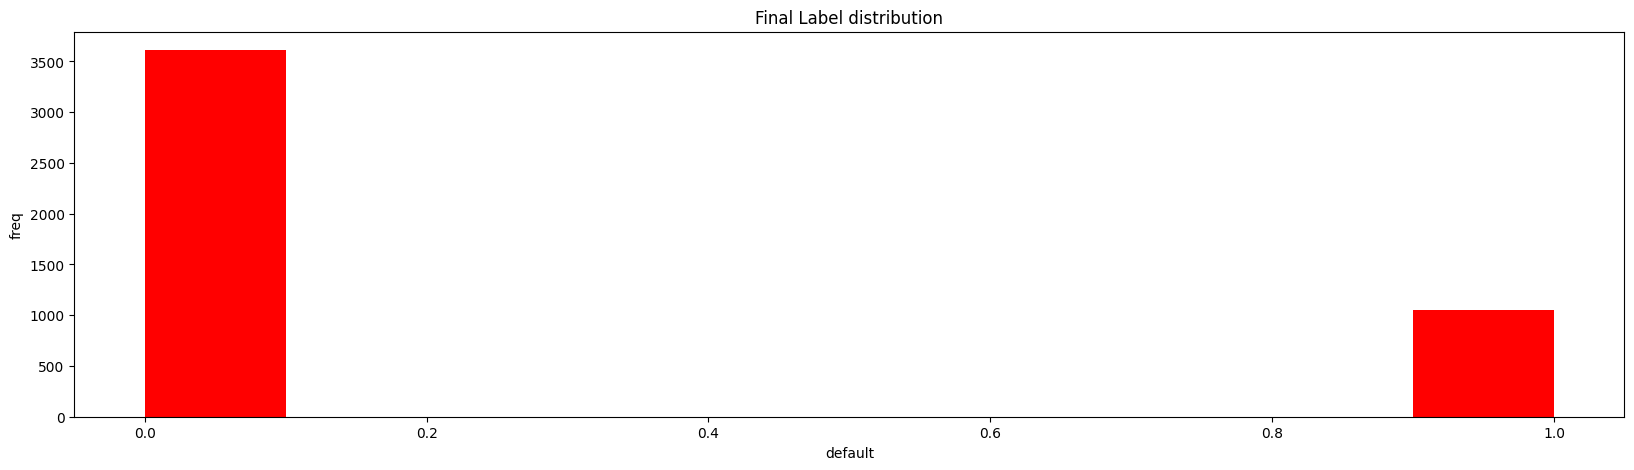

In [86]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5),)
ax.hist(full_df[['default']],color= 'red')
plt.xlabel('default')
plt.ylabel('freq')
plt.title('Final Label distribution')
plt.show()

In [77]:
print('##### columns having more than 90% same values #####')
for col in full_df.columns:
    if list(full_df[[col]].value_counts())[0]/len(full_df[[col]]) > .9:
        print(col,end = ',')

##### columns having more than 90% same values #####
v8,v20,v22,v26,v29,v40,v47,

In [78]:
print("##### percentage of null data in the entire dataframe #####")
null=round((full_df.isna().sum()/full_df.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null=null.to_frame().rename(columns={0:'Missing %'})
null.head(4)

##### percentage of null data in the entire dataframe #####


,Missing %
v27,31.94%
default,25.38%
v45,19.21%
v44,19.21%


### <span style="color:blue">2.2 Univariate analysis Observations </span>

    - a. some of the columns have the same values more than 90 % of the time.
    - b. We can ignore these columns, because they don't contribute any significant information to predict loan
    - c. Those columns are v8,v20,v22,v26,v29,v40,v47
    - d. Some of the columns are having very skewed data, These skewed data could be transformed using Log
    - e. example v6,v10 ...
    - f. For data imputation first we will transform the columns (that needs transformation)
    - g. log transformed columns will be imputed using mean, other columns are imputed with median(because skewness)
    - h. The final label column has imbalanced data, there are more numbers 0(no default) vs 1 (default)
    - i. we will be using some sampling strategy to mitigate this issue

### <span style="color:blue">2.3 Bivariate analysis </span>

In [79]:
corr = full_df.corr()
corr.style.background_gradient(cmap='coolwarm',)

,default,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,screen_height,screen_width
default,1.000000,0.140879,0.147873,0.002552,-0.048956,0.076081,0.020504,-0.025784,-0.022916,-0.026631,-0.006933,0.203305,0.047882,-0.000164,0.002998,0.095551,0.091679,0.038842,-0.031787,-0.003867,-0.016750,0.017602,-0.009435,0.055892,0.017767,-0.005117,-0.036591,-0.016834,0.039793,-0.036988,0.153004,0.194663,-0.011516,-0.037180,-0.030189,-0.008502,0.152924,0.105722,0.144680,0.030327,-0.004173,0.034504,0.004155,0.155966,0.158224,0.145714,-0.009551,-0.022421,0.003150,-0.028196,0.010734,-0.063198,-0.066602
v1,0.140879,1.000000,0.317934,0.046778,-0.060170,0.247292,0.090051,-0.031791,0.010676,0.089919,0.033538,0.400751,0.171028,0.015706,0.026890,0.080287,0.219590,-0.001608,0.047261,0.089762,0.036596,0.051506,0.043121,0.181790,0.153688,0.086510,0.087052,-0.009911,0.165125,0.014508,0.318611,0.372376,-0.010754,0.014193,0.005472,0.050565,0.359339,0.310853,0.019335,0.085526,0.062863,0.131910,0.122247,0.320093,0.749162,0.487521,0.001516,0.079844,0.104103,0.006137,0.048504,0.021825,0.029082
v2,0.147873,0.317934,1.000000,0.169593,-0.064950,0.381217,0.446426,-0.078667,0.055560,0.086538,0.029763,0.694073,0.805513,-0.055996,0.114512,0.235770,0.320783,0.029581,-0.031577,0.040120,0.007618,-0.004142,0.008107,0.819877,0.283762,0.037944,-0.000008,0.005219,0.779546,-0.029261,0.994943,0.646848,-0.007459,0.019621,-0.034149,-0.001388,0.614746,0.498487,0.068249,0.413879,-0.011500,0.701319,0.062600,0.936187,0.404780,0.375241,0.031840,0.018502,0.344692,0.012349,-0.007592,0.003490,0.008364
v3,0.002552,0.046778,0.169593,1.000000,-0.008581,-0.022373,0.223621,-0.034074,0.066545,0.055455,0.016209,0.059781,0.202064,-0.048668,0.505389,0.264957,0.005586,-0.003036,-0.008026,-0.004733,-0.006984,0.024983,0.003821,0.196432,0.111613,0.003500,-0.010437,0.017625,0.211560,-0.010351,0.159955,-0.004094,0.001992,0.002992,-0.006942,0.007328,0.035842,0.043915,-0.019874,0.288505,0.019866,0.488063,-0.011401,0.117041,0.039278,0.213937,0.025248,-0.004243,0.165134,0.008882,0.018397,-0.012641,-0.013668
v4,-0.048956,-0.060170,-0.064950,-0.008581,1.000000,-0.023055,-0.024674,0.042840,0.012762,0.049609,-0.008210,-0.065061,-0.040173,-0.000526,0.004869,-0.034326,0.024799,-0.027279,0.006686,0.019652,0.001820,-0.001176,0.042153,-0.044796,-0.034693,-0.008302,0.019419,-0.011347,-0.036610,0.030806,-0.065755,-0.114860,-0.000549,-0.025405,0.011471,-0.014173,-0.063027,-0.052295,-0.052411,-0.029811,-0.017676,-0.038039,0.006027,-0.066097,-0.073155,-0.033989,-0.017423,-0.003555,-0.012309,-0.012449,-0.007796,-0.018071,-0.013048
v5,0.076081,0.247292,0.381217,-0.022373,-0.023055,1.000000,0.043379,0.001627,0.002352,0.050117,0.020326,0.474353,0.241088,0.009553,-0.034364,0.018404,0.432549,-0.078593,-0.001552,0.058413,0.041705,0.037984,0.034612,0.220028,0.112829,0.081038,0.041866,-0.019949,0.252948,0.015418,0.387292,0.637049,-0.014975,0.028486,-0.006009,0.033354,0.439549,0.434364,0.059308,0.023395,0.037095,0.100939,0.077871,0.405484,0.313506,0.228832,0.009713,0.009626,0.011798,0.018878,0.032346,0.089239,0.085664
v6,0.020504,0.090051,0.446426,0.223621,-0.024674,0.043379,1.000000,-0.030507,0.023031,0.016282,0.007659,0.086355,0.715062,-0.015808,0.104522,0.176505,0.044603,0.077121,-0.018372,0.019830,0.000900,0.005420,0.001255,0.739584,0.111685,0.002241,-0.003688,0.024040,0.702521,-0.011497,0.371993,0.081450,-0.005480,0.011661,-0.021334,0.006227,0.098038,0.088038,0.026088,0.913189,-0.001003,0.741465,0.029434,0.334490,0.104709,0.182434,0.029567,0.000775,0.868101,0.011288,0.003746,0.016809,0.016585
v7,-0.025784,-0.031791,-0.078667,-0.034074,0.042840,0.001627,-0.030507,1.000000,-0.005873,-0.019329,0.029884,-0.072590,-0.046022,0.034757,-0.031614,-0.038495,-0.020124,-0.056768,0.007734,-0.004665,-0.007952,-0.013570,-0.016065,-0.044204,-0.037572,0.034053,-0.001088,-0.013693,-0.049258,0.046509

In [80]:
print('##### some of the columns having high correlation(more than .9) #####')
# https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on
# Create correlation matrix
corr_matrix = full_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

##### some of the columns having high correlation(more than .9) #####
['v23', 'v28', 'v30', 'v34', 'v39', 'v42', 'v43', 'v49', 'screen_width']


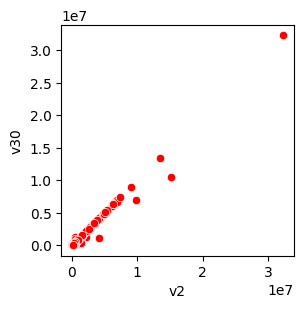

In [81]:
plt.figure(figsize = (3, 3))
sns.scatterplot(x = 'v2', y = 'v30', data = full_df, color = 'red')
plt.show()

### <span style="color:blue">2.4 Bivariate analysis Observations </span>

    - a. Some of the columns are highly correlated
    - b. for example v2-v30 has correlation coefficient of .99
    - c. we can drop one of those columns

### <span style="color:blue">3. Final columns/Features </span>

In [83]:
# droping columns that are not important for analysis

# user's device information , they will not matter while doing default prediction
# colinear columns has to be removed
# columns having more than 90% same values will be removed

columns_not_used = [
    'decision_id', 'brand', 'carrier', 'device_name', 'gms_version',
    'manufacturer', 'network_type', 'screen_height', 'screen_width',
    'screen_dpi'
]

colinear_columns = ['v23', 'v28', 'v30', 'v34', 'v39', 'v42', 'v43', 'v49']
very_skewed_columns = ['v8', 'v20', 'v22', 'v26', 'v29', 'v40', 'v47']
log_transform_columns = [
    'v6',
    'v10',
    'v11',
    'v12',
    'v14',
    'v15',
    'v24',
    'v27',
    'v32',
    'v38',
    'v41',
    'v45',
    'v46',
    'v48',
]

final_columns = sorted(list(
    set(full_df.columns) - set(columns_not_used) - set(colinear_columns) -
    set(very_skewed_columns)),
                       reverse=True)
print('##### total number of features/columns after removing unnecessary columns #####', len(final_columns))

##### total number of features/columns after removing unnecessary columns ##### 37
